In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [11]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

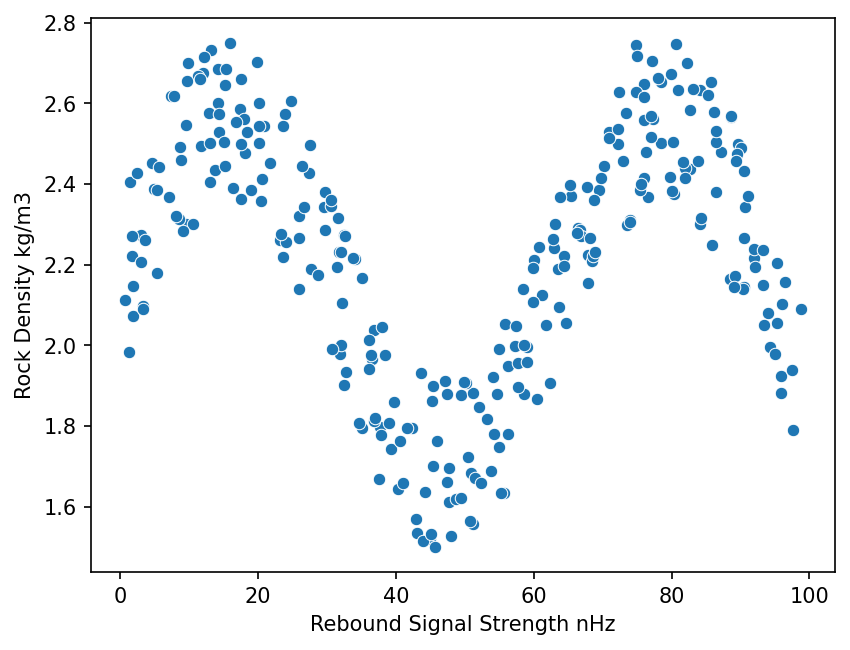

In [7]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x= 'Rebound Signal Strength nHz', y ='Rock Density kg/m3')

In [8]:
X = df['Rebound Signal Strength nHz'].values.reshape(-1, 1)
y = df['Rock Density kg/m3']

In [9]:
from sklearn.model_selection import train_test_split

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

In [46]:
def model_run(model,  X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    
    print(f"MAE: {mean_absolute_error(y_test, model_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_pred))}")
    
    signal_range = np.arange(0, 100, 1)
    signal_pred = model.predict(signal_range.reshape(-1, 1))
    plt.plot(signal_range, signal_pred, 'red', '--')
    sns.scatterplot(data=df, x= 'Rebound Signal Strength nHz', y ='Rock Density kg/m3')
    

MAE: 0.211198973318633
RMSE: 0.2570051996584629


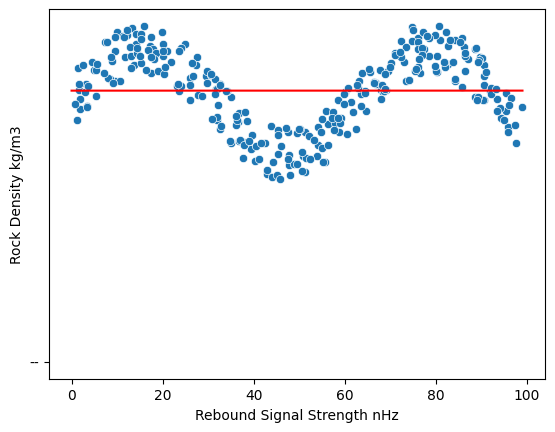

In [47]:
model_run(LinearRegression(),  X_train, X_test, y_train, y_test)

In [50]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969168049270058
RMSE: 0.13807520083403252


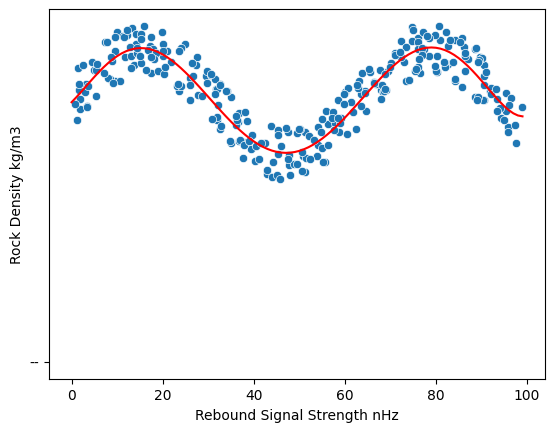

In [51]:
model_run(pipe,  X_train, X_test, y_train, y_test)

MAE: 0.12017510123813938
RMSE: 0.13498358709618385


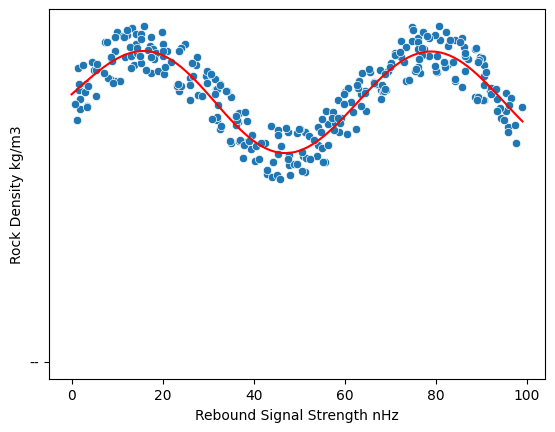

In [52]:
model_run(SVR(),  X_train, X_test, y_train, y_test)

MAE: 0.11702955128909416
RMSE: 0.13335364509538658


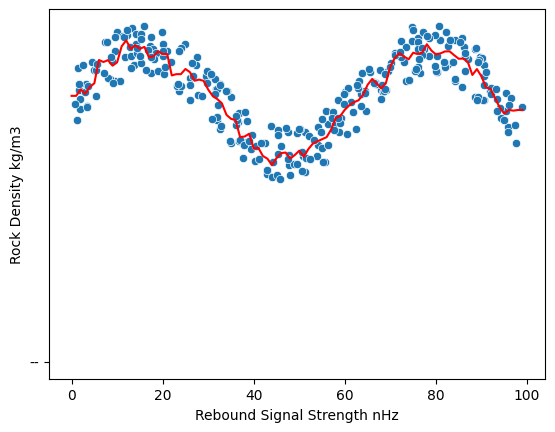

In [56]:
model_run(KNeighborsRegressor(n_neighbors=6),  X_train, X_test, y_train, y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


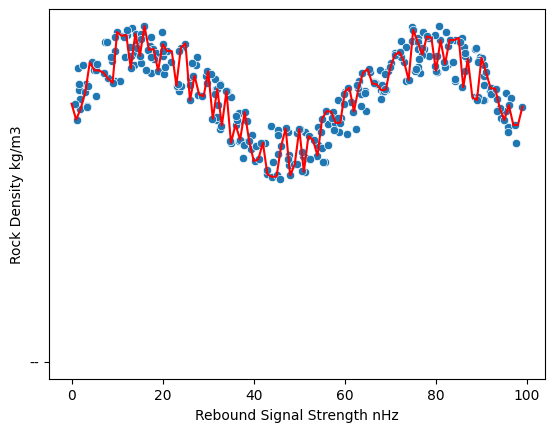

In [57]:
model_run(DecisionTreeRegressor(),  X_train, X_test, y_train, y_test)

MAE: 0.11167244513745726
RMSE: 0.1344695357853378


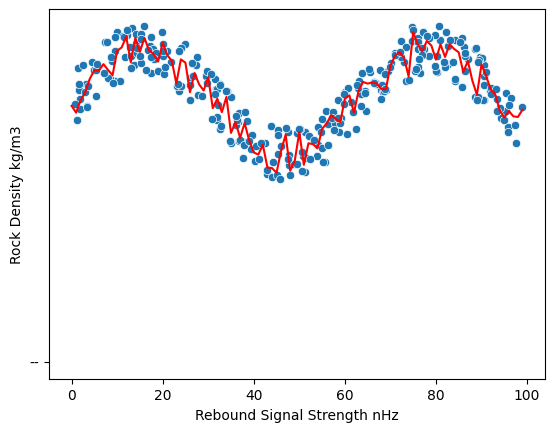

In [58]:
model_run(RandomForestRegressor(),  X_train, X_test, y_train, y_test)